# Monte Carlo Methods

This exercise address the use of “random” numbers in Monte Carlo techniques. These are often the fastest or most straightforward way of tackling complicated problems in computational analysis.

You should use the random number routines included in numpy.random :
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

This library uses the "Mersenne Twister" algorithm internally, which is a modern, well behaved, pseudo-random number generator. Note that, by default, the generator will be initialised with a "seed" based on the time when the programme is started - giving a different sequence of numbers every time you run the programme. You may find it useful, while debuggging, to manually set a fixed "seed" at the start of the programme.  This will result in an identical sequence of random numbers, every time you run the programme.

## Q1 - Generating Distributions

In practise we usually want to generate floating point numbers with a particular distribution. Numpy.random includes several built-in distributions, however we often need to write our own. Two methods for achieving this were discussed in Lecture 3 :
1) an analytical function derived from the cumulative distribution function of the desired distribution.
2) the accept/reject method

### 1a)
Write code to generate random angles $\theta$, between 0 and $\pi$, with a probability distribution proportional to ${\rm sin}(\theta)$. You should write one routine based on the analytical method 1), and another using the accept/reject method. Both routines should use _numpy.random.random()_ to generate floating point numbers with a distribution between 0 and 1, and convert this to the desired ${\rm sin}(\theta)$ distribution.

In [3]:


import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from random import seed



class angles():
    
    randx_vals = [] #class variables so that the values dont get regenerated every time it is called.
    randsin_vals = []
    randy_vals = []    

    def __init__(self, datapoints):
        self.datapoints = datapoints #determines the number of randomly generated datapoints
    
    def analytical(self):
        for i in range(0,self.datapoints,1): 
            randx = np.random.random()  #randomly generates values for the x axis
            randy = np.arccos(1-randx*2)
        
            angles.randx_vals.append(randx)
            angles.randy_vals.append(randy)
        
    
    def acceptreject(self):
        
        for i in range(self.datapoints): 
            randx = np.random.random()* np.pi  #randomly generates values for the x axis
            randy = np.random.random() #randomly generates values for the y axis
            randsin = np.sin(randx) #randomly generates the sin of the x axis value for comparison.
            
            angles.randx_vals.append(randx)
            angles.randy_vals.append(randy)
            angles.randsin_vals.append(randsin)
         
    
            if randy > randsin: #to remove any points that do not exist within the sin probability distribution.
                angles.randy_vals.remove(randy)
                angles.randx_vals.remove(randx)
                angles.randsin_vals.remove(randsin)
            else:
                pass    





### 1b)
Now verify that the two routines produce the desired distribution, and evaluate their performance (in both cpu terms and accuracy).  Discuss your results in the text cell below.

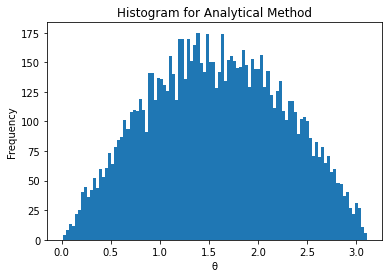

Out of  10000  randomly genereated datapoints, only  6468  fell under the desired condition.


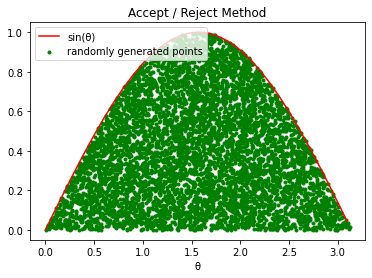

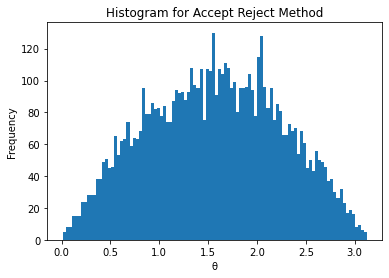

NameError: name 'time' is not defined

In [4]:

angleset1 = angles(10000) #defines a set of angles.
angleset1.analytical() #calls the analytical function.


plt.hist(angleset1.randy_vals,100) #plots histogram.
plt.xlabel('\u03B8')
plt.ylabel('Frequency')
plt.title('Histogram for Analytical Method')
plt.show()


angles.randx_vals.clear() #clears all the data from the previous histogram.
angles.randsin_vals.clear()
angles.randy_vals.clear()


angleset2 = angles(10000) #defines a new set of angles.
angleset2.acceptreject()


plt.scatter(angleset2.randx_vals,angleset2.randy_vals,marker='.', label = 'randomly generated points', color = 'green')
print('Out of ', angleset2.datapoints,' randomly genereated datapoints, only ', len(angleset2.randx_vals), ' fell under the desired condition.')


#Drawing the sine graph
xaxis = np.arange(0, np.pi, 0.1)
sinx = np.sin(xaxis)
plt.plot(xaxis,sinx,'-', label = 'sin(\u03B8)', color = 'red')
plt.legend()

plt.title('Accept / Reject Method')
plt.xlabel('\u03B8')
plt.show()



plt.hist(angleset2.randx_vals,100)
plt.xlabel('\u03B8')
plt.ylabel('Frequency')
plt.title('Histogram for Accept Reject Method')
plt.show()


#comparing efficiencies of each method according to the number of inputted angles.
num_of_angles = []
analytical_times = []
AR_times = []

for i in range(0,4000,500):
    a =  time.time()
    angleset1 = angles(i) #defines a set of angles.
    angleset1.analytical() #calls the analytical function.
    b =  time.time()
    analytical_times.append(b-a) #appends the processing time into a list
    

    a =  time.time()
    angleset2 = angles(i) #defines a new set of angles.
    angleset2.acceptreject()
    b =  time.time()
    AR_times.append(b-a)
    
    num_of_angles.append(i)

    print(i)



plt.plot(num_of_angles, AR_times, label = 'Accept/ Reject Method')
plt.plot(num_of_angles, analytical_times, label = 'Analytical Method')
plt.xlabel('Number Of Generated Angles')
plt.ylabel('Processing Time')
plt.legend()
plt.show()


'''
Discussion:

As shown below, the accept/ reject method is a lot less efficient than the analytical method.
This is because the accept/reject method needs to build an entire list of values and analyses each one.
This section simply demonstrates how each method works. They will be adapted into practical use later on.
The accept reject method will be altered to become more efficient by introducing another variable to represent the probability density.


What I was going to do too (before I got sick):
- resize the histograms so that the maximum bin value was at 1
- fit a sine graph to it, with the same x ticks as the histogram
- find the average error between the histogram and the sine graph to determine accuracy

'''


## Q2 - Simulation
A very common use of Monte Carlo is in simulating experimental data. In simulations, an entire experiment can be reproduced data point by data point, with random numbers being used to model unknowable or changing effects such as the experimental resolution or quantum variations.

In this question, we will simulate the cosmic ray experiment shown below.
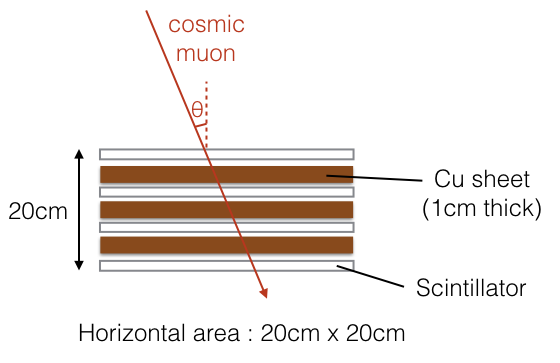
The experiment comprises 4 detection layers, each of which will produce a signal when a particle traverses the detector, separated by three sheets of copper, which will stop a fraction of muons, allowing a measurement of the muon lifetime to be made.

You can assume the detector has the following parameters :
* the efficiency of each of the 4 layers to detect a muon or electron is, from top to bottom : 55%, 60%, 85%, 50%.
* the probability of a cosmic ray muon to stop in 1cm of copper is $5\times10^{-3}$.
* electrons are emitted isotropically during decay of a stopped muon.
* decay electrons have energy 50 MeV and maximum path length of 1.8cm in copper.

In order to model the initial distribution of cosmic rays, we can assume the anuglar distribution is proportional to ${\rm cos}^2(\theta)$, for zenith angle $\theta$.  The overall normaliation can be taken from the intensity of _vertical_ muons to be 70 $m^{-2}s^{-1}sr^{-1}$. (See PDG review of cosmic rays : http://pdg.lbl.gov/2019/reviews/rpp2019-rev-cosmic-rays.pdf)


### 2a)
Using the model above, write code to simulate each muon that passes nearby the experiment. You will need to generate random numbers with appropriate distributions for the starting point and direction of each muon, and propagate each muon to the detector. You should generate further random numbers to model the stopping and decay process; ie. whether a muon stops in a given layer, and the direction of the decaying electron.

(Note that for the electron decay, you should generate points that are uniformly distributed on the unit sphere - simply generating two angles between 0 and $2\pi$ will _not_ give the correct distribution!)

You should discuss the design of your code in the text cell below.

-------------------------------------------
There is an obervation function built in for a single muon.
The muons are generated 5cm above the surface of the first scintillator.
A muon will have an original scattering angle proportional to cos^2(θ).
The muon's path will turn orange if it decays into an electron.
When a scintillator detects a particle, it will display a translucent red point.
Electrons can not travel further than 1.8cm inside copper plates.
When a muon decays, the resulting electron will be assigned a new angle of scattering.
-------------------------------------------
you have chosen to plot  100 muons.
Muon  1 generated.
Muon  2 generated.
Muon  3 generated.
Muon  4 generated.
Muon  5 generated.
Muon  6 generated.
Muon  7 generated.
Muon  8 generated.
Muon  9 generated.
Muon  10 generated.
Muon  11 generated.
Muon  12 generated.
Muon  13 generated.
Muon  14 generated.
Muon  15 generated.
Muon  16 generated.
The muon decayed.
The copper sheet stopped the electron.
Muon 

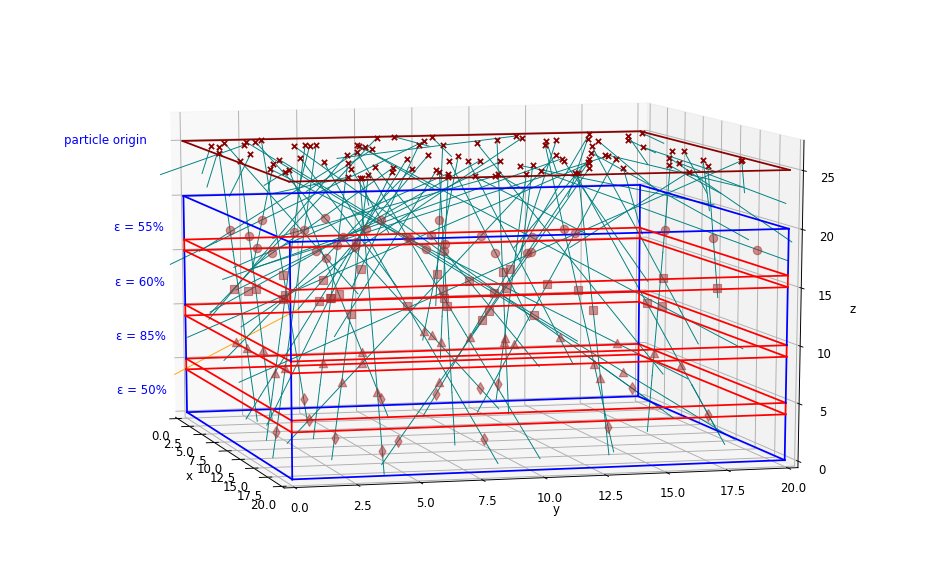

In [5]:


#question 2
#the aim in this code is to limit the indentations as much as possible, which limits the computational complexity and thus the processing time.
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from mpl_toolkits.mplot3d import Axes3D
from numpy import random
import time


def drawsquare(z, col): #function to easily draw the components of the system. this one draws the horizontal lines
    ax.plot([0,20], [20,20],[z,z], color = col)
    ax.plot([0,20], [0,0],[z,z], color = col)
    ax.plot([0,0], [0,20],[z,z], color = col)
    ax.plot([20,20], [0,20],[z,z], color = col)

def drawthick(z1,z2,col): #this function draws the vertical lines.
    ax.plot([0,0], [0,0],[z1,z2], color = col)
    ax.plot([0,0], [20,20],[z1,z2], color = col)
    ax.plot([20,20], [0,0],[z1,z2], color = col)
    ax.plot([20,20], [20,20],[z1,z2], color = col)

def system():
    #drawing the copper plate and scintillator arrangement
    drawsquare(0, 'blue')
    drawsquare(20, 'blue')
    
    drawthick(0,4,'blue')
    drawthick(16,20,'blue')
    drawsquare(16,'red')
    drawthick(4, 5, 'red')
    drawsquare(4,'red')
    drawsquare(5,'red')
    drawthick(5, 9, 'blue')
    drawsquare(9, 'red')
    drawthick(9, 10, 'red')
    drawsquare(10, 'red')
    drawthick(10, 15, 'blue')
    drawsquare(15, 'red')
    drawthick(15,16, 'red') 
    drawsquare(25, 'darkred')#the origin of the particles
    
    ax.view_init(azim=-15, elev = 10) #sets the view rotation of the image
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_xlim3d(0,20)
    ax.set_ylim3d(0,20)
    ax.set_zlim3d(0,27)

def text():    #written for azim =-15, elev = 20. 
    ax.text(0, -3, 17, "\u03B5 = 55%", color='blue')
    ax.text(0, -3, 12, "\u03B5 = 60%", color='blue')
    ax.text(0, -3, 7, "\u03B5 = 85%", color='blue')
    ax.text(0, -3, 2, "\u03B5 = 50%", color='blue')
    ax.text(0, -5, 25, "particle origin", color='blue')
    


def randangle_cos():
    tries = 100 # the number of times the loop is allowed repeat itself before it stops.
    for i in range(tries):
        x = random.uniform(-90, 90) #range of angles in degrees.
        y = np.random.random() #generates a number between 0 and 1. this works as the 'probability value'.
        rad =  math.radians(x)
        n = np.cos(rad)**2
        if y > n :
            x = random.uniform(-np.pi/2, np.pi/2) #redefines x and starts over.
        if y < n :
            break
    return x #returns the angle in degrees.

def electronpath(theta1, phi1):
    # condition to stop the electron if path length is larger than 1.8cm. repeated for each copper plate.
    pathx = 1 / np.cos(theta1)
    pathy = 1 / np.cos(phi1)
    return pathx, pathy


def pathplotter(muons): #the main function with all the muon conditions
    counter = 1
    print('you have chosen to plot ', muons , 'muons.')
    for i in range(0,muons):
        mcol1 = 'teal'
        mstyle = '-'
        #generating a random x and y coordinate for the particle
        c =  random.uniform(0,20) 
        a = c #so the same randomly generated number can be used multiple times. without this redefenition, the number will change everytime c is called.

        d = random.uniform(0,20)
        b = d

        x0 = a#multiple start points generated to plot each stage in case of decay into electron.
        y0 = b 
        z0 = 25
        randtheta = randangle_cos()#returns an angle with probability distribution proportional to cos^2.
        randphi = randangle_cos()
        
        scatx =  x0 #scat(x,y,z) will represent the value of x,y and z after each step.
        scaty= y0
        scatz = z0   
        
        theta1 = math.radians(randtheta)
        phi1 =  math.radians(randphi)
        dz = 1 #step size for each calculation going down in z. directly affects the speed and efficiency of the code.
        ax.scatter(scatx, scaty, scatz, marker = 'x', s = 20, color = 'darkred') #plots where the muon is generated

        #randomly generated numbers to determine if the muons get stopped or decay. redefined for each particle.
        # outside of the loop because needs to only defined once per particle.
        scint1 = np.random.random()  #probability for scintillator 1, etc
        scint2 = np.random.random()
        scint3 = np.random.random()
        scint4 = np.random.random()
        
        muon_stop1 = np.random.random()# probability value for copper plate 1, etc
        muon_stop2 = np.random.random()
        muon_stop3 = np.random.random()

        stepcount = 0
         #counter to find out the total number of muons that passes through the detector
        while scatz>= 0: #loop that repeats for each particle
            theta = theta1
            phi = phi1
            
            scatx += dz*np.tan(theta) #increment of movement in the x direction
            scaty += dz*np.tan(phi) # increment of movement in the y direction
            scatz -= dz # increment of movement in the z direction
            
            stepcount +=dz
            if muons == 1: #draws a dotted line normal to x-y plane wherever the muon enters the detector.
                if scatz ==20: #limited to when observing 1 muon so that the image is not overcrowded.
                    plt.plot([scatx,scatx], [scaty,scaty],[0,25], '--', color = 'blue', alpha = 0.8)
                    plt.plot([scatx,scatx], [0,20],[20,20], '--', color = 'blue', alpha = 0.8)
                    plt.plot([0,20], [scaty,scaty],[20,20], '--', color = 'blue', alpha = 0.8)
                    plt.plot([scatx,scatx], [0,20],[0,0], '--', color = 'blue', alpha = 0.8)
                    plt.plot([0,20], [scaty,scaty],[0,0], '--', color = 'blue', alpha = 0.8)   
                    plt.plot([x0,x0], [y0,y0],[0,25], '--', color = 'green', alpha = 0.8)  
                    
                if scatz == 20 :
                    
                    plt.plot([x0,x0], [0,20],[25,25], '--', color = 'green', alpha = 0.8)
                    plt.plot([0,20], [y0,y0],[25,25], '--', color = 'green', alpha = 0.8)                     
                    plt.plot([x0,x0], [0,20],[0,0], '--', color = 'green', alpha = 0.8)
                    plt.plot([0,20], [y0,y0],[0,0], '--', color = 'green', alpha = 0.8)    
                pass

            if scatx >20 or scatx<0 or scaty >20 or scaty < 0: #boundary conditions to erase any particle path that goes beyond the sides of the detector.
                ax.plot([x0, scatx], [y0, scaty], [z0, scatz], mstyle, color = mcol1, linewidth = 0.8) # to get around the problem of the line only plotting if it reaches the next plate.
                break

            #-------------------------------------------------------------------------------

            #probability of detecting a muon or electron for each scintillator
            if scatz == 18: #midpoint of the first scintillator
                if scint1 <= 0.55: #sets a 55% probability of being detected.
                    ax.scatter(scatx, scaty, 18, marker = 'o', color = 'brown', s = 50, alpha = 0.5)
            if scatz == 13: #second scintillator, etc
                if scint2 <= 0.6:
                    ax.scatter(scatx, scaty, 13, marker = 's', color = 'brown', s = 50, alpha = 0.5)
            if scatz == 7: 
                if scint3 <= 0.85:
                    ax.scatter(scatx, scaty,7, marker = '^', color = 'brown', s = 50, alpha = 0.5)
            if scatz == 2: 
                if scint4 <= 0.5:
                    ax.scatter(scatx, scaty,2, marker = 'd', color = 'brown', s = 50, alpha = 0.5)
            #the conditions do not hange if it is an electron.

            #-------------------------------------------------------------------------------

            #the probability of a muon completely being stopped
            #the following if statements also plot the muon/electron's path between the copper plates.
            if scatz == 16: #position of first copper plate
                ax.plot([x0, scatx], [y0, scaty], [z0, scatz], mstyle, color = mcol1, linewidth = 0.8)
                x0 = scatx
                y0 = scaty
                z0 =  scatz
                if muon_stop1 <= 0.005: #probability of the muon being stopped and decaying
                    print('The muon decayed.')
                    mcol1 = 'orange'#the path turns orange if the muon decays into an electron.
                    u = math.radians(random.uniform(0,57)) #57 degrees is approximately 1 radian.
                    theta1 = np.arccos(2*u-1)#newly generated scattering angles
                    v = math.radians(random.uniform(0,57))
                    phi1 = 2*np.pi*v
                    
                    pathx = electronpath(theta1, phi1)[0]
                    pathy = electronpath(theta1, phi1)[1]
                    if pathx >1.8 or pathy >1.8: #coded due to the condition that electrons can only travel 1.8cm in copper.
                        print('The copper sheet stopped the electron.')
                        break
            if scatz == 10: 
                ax.plot([x0, scatx], [y0, scaty], [z0, scatz], mstyle, color = mcol1, linewidth = 0.8)
                x0 = scatx
                y0 = scaty
                z0 =  scatz
                if muon_stop2 <= 0.005:
                    print('The muon decayed.')
                    mcol1 = 'orange'
                    mcol1 = 'orange'#the path turns orange if the muon decays into an electron.
                    u =  math.radians(random.uniform(0,57))

                    theta1 = np.arccos(2*u-1)#newly generated scattering angles
                    v =  math.radians(random.uniform(0,57))
                    phi1 = 2*np.pi*v
                    pathx = electronpath(theta1, phi1)[0]
                    pathy = electronpath(theta1, phi1)[1]
                    if pathx >1.8 or pathy >1.8: 
                        print('The copper sheet stopped the electron.')
                        break
            if scatz == 5:
                ax.plot([x0, scatx], [y0, scaty], [z0, scatz], mstyle, color = mcol1, linewidth = 0.8)
                x0 = scatx
                y0 = scaty
                z0 =  scatz
                if muon_stop3 <=0.005:
                    print('The muon decayed.')
                    mcol1 = 'orange'
                    mcol1 = 'orange'#the path turns orange if the muon decays into an electron.
                    u =  math.radians(random.uniform(0,57))

                    theta1 = np.arccos(2*u-1)#newly generated scattering angles
                    v =  math.radians(random.uniform(0,57))
                    phi1 = 2*np.pi*v
                    pathx = electronpath(theta1, phi1)[0]
                    pathy = electronpath(theta1, phi1)[1]
                    if pathx >1.8 or pathy >1.8: 
                        print('The copper sheet stopped the electron.')
                        break      
            if scatz == 0: #plots the line from the last copper plate to z = 0
                ax.plot([x0, scatx], [y0, scaty], [z0, scatz], mstyle, color = mcol1, linewidth = 0.8)

            else:
                pass

            
        fig.tight_layout()
        print('Muon ', counter, 'generated.')
        counter +=1
        
    print(passthrough)
    return passthrough
        
        
print('-------------------------------------------')      
print('There is an obervation function built in for a single muon.')
print('The muons are generated 5cm above the surface of the first scintillator.')
print('A muon will have an original scattering angle proportional to cos^2(\u03B8).')
print("The muon's path will turn orange if it decays into an electron.")
print('When a scintillator detects a particle, it will display a translucent red point.')
print('Electrons can not travel further than 1.8cm inside copper plates.')
print('When a muon decays, the resulting electron will be assigned a new angle of scattering.')
print('-------------------------------------------')



###################################

fig = plt.figure(figsize=(11,7), dpi=85)
ax = fig.gca(projection='3d')
###################################

a = time.time()
passthrough = 0
pathplotter(100) #plots random particle paths for a desired number of muons.
b = time.time()
text() #prints the text
system() #draws the arrangement of detectors and coppers

print('Processing time: ',b-a, ' seconds.')

#################################


**Discuss the design of your code here**

The muons all originate from the top of the detector. This was done in preparation for the question in 2c where it asks which muons passed through the entire detector, meaning the whole 20cm of copper plates and scintillators. The origin of each muon is 5cm above the first scintillator, which was a design choice to allow for proper visualisation  and to reduce overcrowding of lines and scatter plots. 

The detector arrangement was designed using simple line plots in the 3D plane. Horizontal and vertical lines were coded into functions which were then used to draw each of the components with their specific colours. The copper plates were drawn using red lines, while the scintillators were outlined using the blue lines.

The angles for the incoming muons were generated using a modified version of the function in question 1. Instead of generating multiple values and storing them in a list, the value y was matched to a cos^2 distribution. All possible values of y have the same probability of being generated and all that do not match with the cos^2 distribution were erased. Therefore, the y parameter became the "probability value". As shown in 2b, the angles generated will form the probability distribution of the desired function.

Pathplotter() is the function which houses the main loop which plots the path of each muon that enters the detector. It plots individual lines between each copper layer because the path can be affected by whether or not the muon decays into an electron, and whether or not the electron continues to travel or gets stopped by the plate. Because the while loop is controlled by a -= in the z direction, the muons can only travel towards z = 0.

Each probability in the system is enclosed within an if function. Lets assume that the probability of an event is n. A random number between 0 to 1 is generated, and if that value is less than n, the event happens. This method is used for the scintillator efficiencies and the electron decay chances. The if statements are placed on the physical z coordinates or where the event would happen (for example the probability of being detected by the first scintillator takes place in the middle  of that scintillator).

Each randomly generated muon is marked with a small x at the particle origin plane. the particles detected by the first scintillator are marked by circles, squares by the second, triangles by the third and diamonds by the fourth.

When the muon decays into an electron, the randomly generated angles follows a spherical distribution, as described by the modifications to the generated u and v values. The source for this is https://mathworld.wolfram.com/SpherePointPicking.html . 
 
This code (part a) is not designed for generating high number of muons (above 1000) because the plotting commands makes it very inefficient. It is mostly meant for visualisation and data collection for a number of muons below 1000. The code is restructured for part 2c where the processing speed is improved by a thousandfold at the expense of the visual plots.


### 2b)
In the next cell you should validate your code.  The aim is to test separate parts of the code individually, to ensure the expected distributions or behaviour are produced in each case.

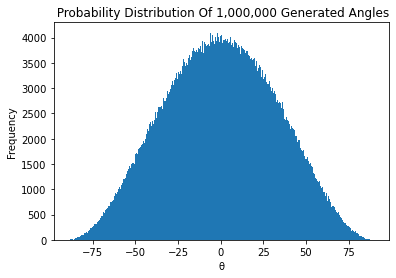

Time taken:  13.821721076965332  seconds.


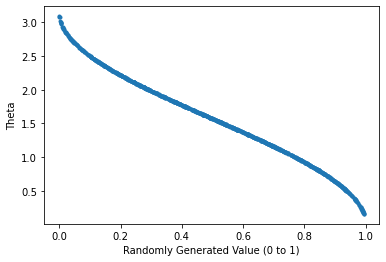

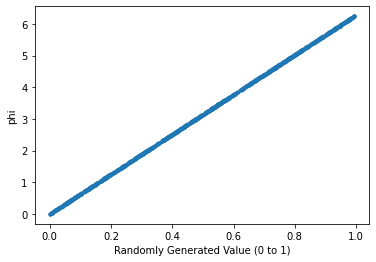

In [7]:
#proof that the code generates a cos^2 distribution.

angles = []
a = time.time()
for i in range(1000000):
    theta = randangle_cos()
    angles.append(theta)
    
b = time.time()
plt.title(' Probability Distribution Of 1,000,000 Generated Angles')
plt.xlabel('\u03B8')
plt.ylabel('Frequency')
plt.hist(angles,500)
plt.show()
print('Time taken: ', b-a,' seconds.')



uvals = []
vvals = []
thetavals = []
phivals = []


for i in range(1000):
    
    u =  math.radians(random.uniform(0,57))
    theta1 = np.arccos(2*u-1)#newly generated scattering angles
    v =  math.radians(random.uniform(0,57))
    phi1 = 2*np.pi*v
    uvals.append(u)
    vvals.append(v)
    thetavals.append(theta1)
    phivals.append(phi1)

plt.scatter(uvals, thetavals, marker = '.')
plt.xlabel('Randomly Generated Value (0 to 1)')
plt.ylabel('Theta')
plt.show()
plt.scatter(vvals, phivals, marker = '.')
plt.xlabel('Randomly Generated Value (0 to 1)')
plt.ylabel('phi')
plt.show()







**You can use this cell to discuss your validation code/results**

This code was an adaptation of 1a accept/reject method. However, instead of generating multiple angles and storing them inside a list, it creates a single value with a probability distribution of a cos^2 plot from -pi/2 to pi/2. The way it does this is by generating a value y which has to be below the cos^2 graph in order for the simultaneously generated x value to be accepted. because every single value from 0 to 1 has an equal probability of being generated, the condition y < cos^2 turns the y values into probability values.

The results were as expected, as shown above. However, at about 1000 iterations, there is an indentation on the peak of the histogram. This indentation goes away after the number of iterations are significantly increased.


### 2c)
Now, use your simulation to estimate :
* The total rate of muons that pass through the detector.
* The fraction of those muons which are registered in 1, 2, 3 or 4 scintillator planes of the detector. 
* The fraction of those muons which decay and produce an electron that can be detected in an adjacent scintillator layer.

-------------------------------------------
There is an obervation function built in for a single muon.
The muons are generated 5cm above the surface of the first scintillator.
A muon will have an original scattering angle proportional to cos^2(θ).
The muon's path will turn orange if it decays into an electron.
When a scintillator detects a particle, it will display a translucent red point.
Electrons can not travel further than 1.8cm inside copper plates.
When a muon decays, the resulting electron will be assigned a new angle of scattering.
-------------------------------------------
Processing  50000 muons.

Processing time:  4.453738689422607  seconds.

Fraction of muons that passed through the detector:  0.24
Fraction of muons that have decayed into electrons:  0.00796
Fraction of electrons that were stopped by copper:  0.39

Scintillator data set 1

Percentage of muons detected at scintillator 1:  48.3 %
Percentage of muons detected at scintillator 2:  36.8 %
Percentage of muons de

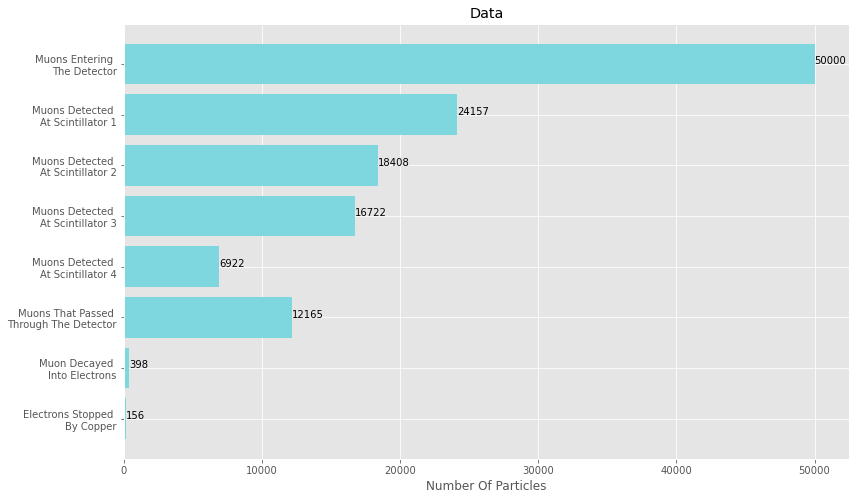

In [8]:
%matplotlib inline
# the plot commands were deleted to drastically improve processing times.
# everything was put into a class so I could take advantage of class variables to draw the bar graphs.
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from mpl_toolkits.mplot3d import Axes3D
from numpy import random
import time

def randangle_cos():
    tries = 100
    for i in range(tries):
        x = random.uniform(-90, 90) 
        y = np.random.random() 
        rad =  math.radians(x)
        n = np.cos(rad)**2
        if y > n :
            x = random.uniform(-np.pi/2, np.pi/2) 
        if y < n :
            break
    return x #returns the angle in degrees.

def electronpath(theta1, phi1):
    pathx = 1 / np.cos(theta1)
    pathy = 1 / np.cos(phi1)
    return pathx, pathy


class muondetector():
    enterdetector = 0 ##################################################################
    passthrough = 0 #class variables so that the bar graph can be plotted.
    detected_scint1 = 0
    detected_scint2 = 0
    detected_scint3 = 0
    detected_scint4 = 0
    total_decays = 0
    stopped_electrons = 0
    pass_scint1 = 0
    pass_scint2 = 0
    pass_scint3 = 0
    pass_scint4 = 0

    def __init__(self, muons):
        self.muons = muons
    
    def pathplotter(self): #the main function with all the muon conditions
        counter = 1
        print('Processing ', self.muons , 'muons.')
        for i in range(0,self.muons):
            #generating a random x and y coordinate for the particle
            c =  random.uniform(0,20) 
            a = c #so the same randomly generated number can be used multiple times
            d = random.uniform(0,20)
            b = d
            x0 = a#multiple start points generated to plot each stage in case of decay into electron.
            y0 = b 
            z0 = 20
            randtheta = randangle_cos()#returns an angle with probability distribution proportional to cos^2.
            randphi = randangle_cos()
            scatx =  x0
            scaty= y0
            scatz = z0   
            theta1 = math.radians(randtheta)
            phi1 =  math.radians(randphi)
            dz = 1 #step size for each calculation going down in z. directly affects the speed and efficiency of the code.
            #randomly generated numbers to determine if the muons get stopped or decay. redefined for each particle.
            # outside of the loop because needs to only defined once per particle.
            scint1 = np.random.random()  #probability for scintillator 1, etc
            scint2 = np.random.random()
            scint3 = np.random.random()
            scint4 = np.random.random()
            
            muon_stop1 = np.random.random() # probability value for copper plate 1, etc
            muon_stop2 = np.random.random()
            muon_stop3 = np.random.random()
    
            stepcount = 0
             #counter to find out the total number of muons that passes through the detector
            while scatz>= 0: #loop that repeats for each particle
                theta = theta1
                phi = phi1
                scatx += dz*np.tan(theta) #increment of movement in the x direction
                scaty += dz*np.tan(phi) # increment of movement in the y direction
                scatz -= dz # increment of movement in the z direction
                stepcount +=dz
                if scatx >20 or scatx<0 or scaty >20 or scaty < 0: #boundary conditions to erase any particle path that goes beyond the sides of the detector.
                    break
                #-------------------------------------------------------------------------------
                #probability of detecting a muon or electron for each scintillator
                if scatz == 18: 
                    muondetector.pass_scint1 +=1
                    if scint1 <= 0.55: #sets a 55% probability of being detected.
                        muondetector.detected_scint1 +=1
                if scatz == 13: 
                    muondetector.pass_scint2 +=1
                    if scint2 <= 0.6:
                        muondetector.detected_scint2 +=1
                if scatz == 7: 
                    muondetector.pass_scint3 +=1
                    if scint3 <= 0.85:
                        muondetector.detected_scint3 +=1
                if scatz == 2: 
                    muondetector.pass_scint4 +=1
                    if scint4 <= 0.5:
                        muondetector.detected_scint4 +=1
                #the conditions do not hange if it is an electron.
                #-------------------------------------------------------------------------------
                if scatz == 20:
                    muondetector.enterdetector += 1
                #the probability of a muon completely being stopped
                #the following if statements also plot the muon/electron's path between the copper plates.
                if scatz == 16: #position of first copper plate
                    x0 = scatx
                    y0 = scaty
                    z0 =  scatz
                    if muon_stop1 <= 0.005: #probability of the muon being stopped and decaying
                        muondetector.total_decays+= 1
                        mcol1 = 'orange'#the path turns orange if the muon decays into an electron.
                        u =  math.radians(random.uniform(0,57))
                        theta1 = np.arccos(2*u-1)#newly generated scattering angles
                        v =  math.radians(random.uniform(0,57))
                        phi1 = 2*np.pi*v
                        pathx = electronpath(theta1, phi1)[0]
                        pathy = electronpath(theta1, phi1)[1]
                        if pathx >1.8 or pathy >1.8: #coded due to the condition that electrons can only travel 1.8cm in copper.
                            muondetector.stopped_electrons+=1
                            break
                if scatz == 10: 
                    x0 = scatx
                    y0 = scaty
                    z0 =  scatz
                    if muon_stop2 <= 0.005:
                        muondetector.total_decays+= 1
                        mcol1 = 'orange'
                        u = math.radians(random.uniform(0,57))
                        theta1 = np.arccos(2*u-1)#newly generated scattering angles
                        v = math.radians(random.uniform(0,57))
                        phi1 = 2*np.pi*v
                        pathx = electronpath(theta1, phi1)[0]
                        pathy = electronpath(theta1, phi1)[1]
                        if pathx >1.8 or pathy >1.8: 
                            muondetector.stopped_electrons+=1
                            break
                if scatz == 5:
                    x0 = scatx
                    y0 = scaty
                    z0 =  scatz
                    if muon_stop3 <=0.005:
                        muondetector.total_decays+= 1
                        u =  math.radians(random.uniform(0,57))
                        theta1 = np.arccos(2*u-1)#newly generated scattering angles
                        v =  math.radians(random.uniform(0,57))
                        phi1 = 2*np.pi*v
                        pathx = electronpath(theta1, phi1)[0]
                        pathy = electronpath(theta1, phi1)[1]
                        if pathx >1.8 or pathy >1.8: 
                            muondetector.stopped_electrons+=1
                            break      
                if scatz == 0: #plots the line from the last copper plate to z = 0
                    muondetector.passthrough += 1
                else:
                    pass
            counter +=1

            
print('-------------------------------------------')
print('There is an obervation function built in for a single muon.')
print('The muons are generated 5cm above the surface of the first scintillator.')
print('A muon will have an original scattering angle proportional to cos^2(\u03B8).')
print("The muon's path will turn orange if it decays into an electron.")
print('When a scintillator detects a particle, it will display a translucent red point.')
print('Electrons can not travel further than 1.8cm inside copper plates.')
print('When a muon decays, the resulting electron will be assigned a new angle of scattering.')
print('-------------------------------------------')

###################################

a = time.time()
muons = 50000
distribution1 = muondetector(muons) #defines the variable in the class
distribution1.pathplotter() #plots random particle paths for a desired number of muons.

b = time.time()

print('\nProcessing time: ',b-a, ' seconds.')
print('\nFraction of muons that passed through the detector: ',  round(muondetector.passthrough / distribution1.muons , 2))
print('Fraction of muons that have decayed into electrons: ',  muondetector.total_decays / distribution1.muons)
print('Fraction of electrons that were stopped by copper: ', round(muondetector.stopped_electrons/ muondetector.total_decays, 2) )
print('\nScintillator data set 1')
print('\nPercentage of muons detected at scintillator 1: ',  round((muondetector.detected_scint1 / distribution1.muons)*100,1),'%')
print('Percentage of muons detected at scintillator 2: ',  round((muondetector.detected_scint2 / distribution1.muons)*100,1),'%')
print('Percentage of muons detected at scintillator 3: ',  round((muondetector.detected_scint3 / distribution1.muons)*100,1),'%')
print('Percentage of muons detected at scintillator 4: ',  round((muondetector.detected_scint4 / distribution1.muons)*100,1),'%')
print('\nScintillator data set 2')
print('\nPercentage of muons detected at scintillator 1: ',  round((muondetector.detected_scint1 / distribution1.pass_scint1)*100,1),'%')
print('Percentage of muons detected at scintillator 1: ',  round((muondetector.detected_scint2 / distribution1.pass_scint2)*100,1),'%')
print('Percentage of muons detected at scintillator 1: ',  round((muondetector.detected_scint3 / distribution1.pass_scint3)*100,1),'%')
print('Percentage of muons detected at scintillator 1: ',  round((muondetector.detected_scint4 / distribution1.pass_scint4)*100,1),'%')

#################################

#creating the bar graph for 2c

plt.style.use('ggplot')
x = ['Muons Entering \nThe Detector','Muons Detected \nAt Scintillator 1','Muons Detected \nAt Scintillator 2','Muons Detected \nAt Scintillator 3','Muons Detected \nAt Scintillator 4', 'Muons That Passed \nThrough The Detector', 'Muon Decayed \nInto Electrons', 'Electrons Stopped \nBy Copper']
y = [ distribution1.muons,muondetector.detected_scint1, muondetector.detected_scint2, muondetector.detected_scint3, muondetector.detected_scint4,muondetector.passthrough,muondetector.total_decays, muondetector.stopped_electrons ]
plt.figure(figsize=(13,8))
x_pos = np.arange(len(x))
plt.barh(x_pos, y, color='#7ed6df')
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.xlabel("Number Of Particles")
title = "Data"
plt.title(title)
plt.gca().invert_yaxis()
plt.yticks(x_pos, x)

plt.show()




**Discuss your results here**

The code was put into a class so that values could be extracted from it without re-running the loop every time. Without the class and class variables, new random numbers would be generated when plotting each component of the muon. Not only was this inefficient,it was statistically incorrect because a new sample of numbers were opened every time the programme needed a new plot.

The scintillator data set 1 take into account all muons generated at z = 20, even those which did not pass through each scintillator.

Scintillator data set 2 only take into account muons that have passed through each scintillator. These values would represent the scintillator efficiencies.

The data which gets displayed is as expected. With an increased number of muons, the ratio of detected muons to the total number that pass through each scintillator converges to their respective efficiencies. The fraction of muon decays also converge to the given value.



This question is well suited to extensions. For example, a negative muon stopping in the Copper may be "captured" by an atomic nucleus, which modifies its lifetime (to ~0.164 $\mu s$). Positive muons are not captured and hence their lifetime is unaffected. You can simulate this, to estimate the expected distribution of muon decay times.  (An even more detailed simulation could include muons that stop in scintillator...)

Feel free to discuss possible extensions with your demonstrator and/or the unit director !

In [ ]:
#extension: seeing how the scintillator efficiency accuracy increases with number of particles


#to test the accuracies in relation to the expected values
test = [10,20,30,40,70,80,100,200,300,800,1000,2000,3000,5000,8000,10000,12000,15000,20000, 30000,40000 , 60000]
values1 = []
values2 = []
values3 = []
values4 = []

for i in range(len(test)):
    distribution = muondetector(test[i])
    distribution.pathplotter()
    values1.append(round((muondetector.detected_scint1 / distribution1.pass_scint1)*100,5))
    values2.append(round((muondetector.detected_scint2 / distribution1.pass_scint2)*100,5))
    values3.append(round((muondetector.detected_scint3 / distribution1.pass_scint3)*100,5))
    values4.append(round((muondetector.detected_scint4 / distribution1.pass_scint4)*100,5))
print(values1)

plt.figure(figsize=(13,6))

plt.plot(test, values1, label = 'Scintillator 1 Efficiency')
plt.plot(test, values2, label = 'Scintillator 2 Efficiency')
plt.plot(test, values3, label = 'Scintillator 3 Efficiency')
plt.plot(test, values4, label = 'Scintillator 4 Efficiency')
plt.xlabel('Number Of Particles') 
plt.ylabel('Scintillator Efficiency')
plt.legend()
plt.show()


## Q3 - Statistical Analysis

In this question, we will explore the use of Monte Carlo methods to understand experiment outcomes.

Standard experimental error analysis frequently uses the assumption that uncertainties are normally distributed. The interpretation of a result quoted as $\mu \pm \sigma$ is taken that the true value lies within the range [$(\mu - \sigma$),$(\mu + \sigma)$] with a certain probability (usually 68%). However, it is not hard to find cases where these assumptions break. A classic example occurs when measuring a parameter that is close to a physical boundary - the standard error treatment may result in a range of values that includes the non-physical region.

A more sophisticated approach is to treat the measurement process as an inverse problem, ie. the inference of model parameters from experimental measurements. (For example, estimation of G from observations of planetary motion). Given a model, we can use Monte Carlo techniques to generate ensembles of "pseudo-experiments", and build up distributions of experimental outcomes for a given set of model parameters. Then it is straightforward to find the range of model parameters that cover an actual experimental observation, within a specified probability.

### 3a)

A "counting experiment" is performed at a collider, to search for the existence of a hypothesised new particle.  The experiment consists of counting the number of events that meet certain criteria. Events can be produced either by the hypothetical signal process, or by known background processes. However, an individual event cannot be ascribed to be signal or background - the only measurable quantity is the _total_ number of events.

Both signal and background processes produce a number of events that is Poisson distributed. The mean number of background events has been estimated to be $4.8 \pm 0.5$.  The mean number of signal events is given by $L \sigma$, where the integrated luminosity $L=10 nb^{-1}$, and $\sigma$ is the (unknown) cross section of the signal process. The number of events observed in the counting experiment is 6.

You should write a Monte Carlo programme that will calculate the upper limit on the signal cross section that is compatible with the observation at 95% confidence level.

You will need to generate pseudo-experiments for a range of different signal cross sections. For each pseudo-experiment, generate random numbers to model the Gaussian uncertainty on the background prediction, and the Poisson variation in both the background and signal production. Ensure that the number of pseudo-experiments are sufficient to measure the experimental distribution for each cross section, and in particular the fraction of the distribution that is _greater_ than the measured value (the confidence level).

How would you incorporate additional uncertainties?  For example, if the uncertainty on the luminosity is 5%, or the efficiency to identify signal events is estimated to be $0.7 \pm 0.1$ ?

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.linalg import inv
import scipy.integrate as integrate
import math
from scipy.stats import iqr


i = 0
while i<10:
    x = []
    n = 0
    for j in np.arange(0,15,0.01):
        poiss = np.random.poisson(10*i) #generates a number from the poisson distribution
        gauss = np.random.normal(4.8,0.5)
        x.append(poiss+gauss)
        n+=1
    #if above 6 is 95% then return i  
    h = 2 * iqr(x) * n**(-1/3)
    y,x,_=plt.hist(x,80)
    integral = 0
    integral_limit = 0
    bin_width = x[1]-x[0]
    
    for k in y:
        area = k*bin_width
        integral+=area

    for l in range(0,len(x)-1):
        if x[l]>6:
            area_limit = y[l]*bin_width
            integral_limit+=area_limit
    print('Integral: ' ,integral,', Limit: ', integral_limit)
    
    if integral_limit/integral>0.95:
        plt.show()
        print('sigma is' , i)
        break
    
    i+=0.01



**Discuss your code and results in this cell**